# HW1: Classification on simple datasets
## Goal: 
1. get familiar with the machine learning processes.
2. understand the applications of KNN, SVM, and Logistic Regression.
3. try different parameters of the networks, and determine the best one.
4. finish the coding

## Datasets:
Two famous ML datasets:
- Iris dataset
 - The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant(Setosa(0), Versicolor(1),  Virginica(2)). 
 - each data instance contains 
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
- The Street View House Numbers (SVHN) Dataset
 - a colorful handwritten digits database collected from house numbers in Google Street View images, containing 73257 digits for training, 26032 digits for testing, and 531131 additional.
 - each data is a 32x32 color image corresponding to a digit from 0-9.

## Method:
KNN, SVM, and Logistic Regression

## Submission:
 1. The final version of this file (rename it to HW1_yourName.ipynb)
 2. A simple report (.doc/.docx) that contains the information below
  - Results part
     - All the results with different parameters (in table format)
     - Screenshots of the learning curves
  - Discussion part
     - Can you find the best parameter?
     - Why this parameter is better than the others?


Upload these two files to Canvas separately, without compressing them into a zip file

## Grading:
- Total: 100 points
- For each dataset, each method is worth 10 points. (60 points total for both datasets)
- For each dataset, the discussion is worth 20 points. (40 points total for both datasets)

# 1. Iris dataset

In [ ]:
# step one: import the needed packages
from sklearn import datasets
import pandas as pd
import numpy as np

In [ ]:
iris_raw = datasets.load_iris() # load iris dataset form sklearn library
iris_raw.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Checking the contents of the data 

wonder what does the raw data look like? Try to print out the variable 'iris_raw' in an empty code block

In [ ]:
iris = pd.DataFrame(data = np.c_[iris_raw['data'], iris_raw['target']],
                    columns= iris_raw['feature_names']+['target']) # Convert raw data into an easy-to-read format
iris.head(10) # check the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
# Checking if the dataset is balanced or not
iris.groupby('target').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,50,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


In [ ]:
# Add the name of the species corresponding to the target
species = []
for i in range(len(iris['target'])):
  if iris['target'][i] == 0:
    species.append('setona')
  elif iris['target'][i] == 1:
    species.append('versicolor')
  else:
    species.append('virginica')
iris['species'] = species
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setona
1,4.9,3.0,1.4,0.2,0.0,setona
2,4.7,3.2,1.3,0.2,0.0,setona
3,4.6,3.1,1.5,0.2,0.0,setona
4,5.0,3.6,1.4,0.2,0.0,setona
5,5.4,3.9,1.7,0.4,0.0,setona
6,4.6,3.4,1.4,0.3,0.0,setona
7,5.0,3.4,1.5,0.2,0.0,setona
8,4.4,2.9,1.4,0.2,0.0,setona
9,4.9,3.1,1.5,0.1,0.0,setona


### train/test data split

In [ ]:
from sklearn.model_selection import train_test_split # import the package for train/test spliting
X = iris.drop(['target', 'species'], axis=1) # or X = iris_raw['data']
y = iris['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.5, random_state=42)

# Model training and testing

## 1) KNN

- Try different parameters for n_neighbors

### Training

In [ ]:
# training
from sklearn.neighbors import KNeighborsClassifier # import the package for KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=9)

### Testing

In [ ]:
# testing
knn_predictions = knn.predict(X_test)
knn_predictions

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 1., 2., 1.])

### Printing the results

In [ ]:
# printing the results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions, average="macro"))
print("Recall:", recall_score(y_test, knn_predictions, average="macro"))
print("F1 score:", f1_score(y_test, knn_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, knn_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, knn_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.96
Precision: 0.9615384615384616
Recall: 0.9565217391304347
F1 score: 0.9563360227812056

Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]

Classification report:
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      0.885     1.000     0.939        23
         2.0      1.000     0.870     0.930        23

    accuracy                          0.960        75
   macro avg      0.962     0.957     0.956        75
weighted avg      0.965     0.960     0.960        75



### Plotting the learning curve

In [ ]:
# Use this block as a black box for plotting the learining curve
# Feel free to dive into the code and figure out how it works
# There's no need to copy and paste this block again.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt
  


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

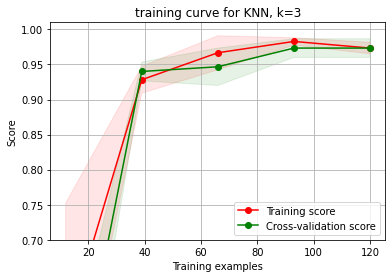

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( knn, 'training curve for KNN, k=3', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

## 2) SVM

- Try different kernels, and record the results
- For more information, refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- finish the code

### Training

In [ ]:
#training
import numpy as np
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

###Testing

In [ ]:
# testing
gram_test = np.dot(X_test, X_test.T)
svc_predictions = clf.predict(X_test)
svc_predictions

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

###Printing the results

In [ ]:
# printing the results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, svc_predictions))
print("Precision:", precision_score(y_test, svc_predictions, average="macro"))
print("Recall:", recall_score(y_test, svc_predictions, average="macro"))
print("F1 score:", f1_score(y_test, svc_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, svc_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]

Classification report:
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75



###Plotting the learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

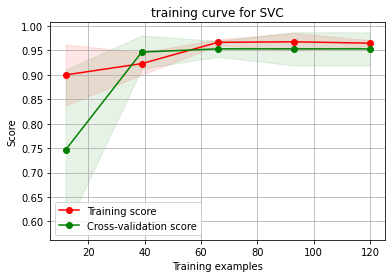

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(clf, 'training curve for SVC', X, y, axes=axes, cv = cv, n_jobs=4)

## 3) Logistic regression
- Try different regularization methods
- Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
- finish the code

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='none', solver='saga')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='saga')

###Testing

In [ ]:
# testing
reg_predictions = log_reg.predict(X_test)
reg_predictions

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

###Printing the results

In [ ]:
# printing the results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, reg_predictions))
print("Precision:", precision_score(y_test, reg_predictions, average="macro"))
print("Recall:", recall_score(y_test, reg_predictions, average="macro"))
print("F1 score:", f1_score(y_test, reg_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, reg_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, reg_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.9866666666666667
Precision: 0.9861111111111112
Recall: 0.9855072463768115
F1 score: 0.9855003940110323

Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]

Classification report:
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      0.958     1.000     0.979        23
         2.0      1.000     0.957     0.978        23

    accuracy                          0.987        75
   macro avg      0.986     0.986     0.986        75
weighted avg      0.987     0.987     0.987        75



###Plotting the learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

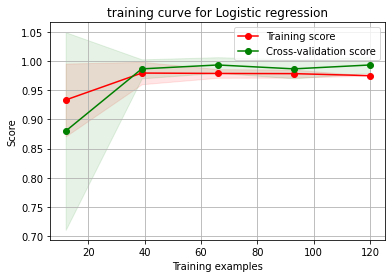

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( log_reg, 'training curve for Logistic regression', X, y, axes=axes, cv = cv, n_jobs=4)

# 2. SVHN Dataset
- download data from http://ufldl.stanford.edu/housenumbers/ 
- finish the code, and record the results

In [ ]:
import scipy.io as sio
import numpy as np
# loading data
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# training set
length_train = 5000 # We use the first 5000 instances here for simplicity. But feel free to use more instances if you don't mind long training sessions.
length_test = 300
X_train = np.zeros([length_train,1024])
y_train = np.zeros([length_train,1])
X_test = np.zeros([length_test,1024])
y_test = np.zeros([length_test,1])

for i in range(length_train):
    data = np.mean(train_data['X'][:,:,:,i], axis=2) # transform data to be compatible for training 
    X_train[i] = data.flatten()
    y_train[i] = train_data['y'][i]

# testing set
for i in range(length_test):
    data = np.mean(test_data['X'][:,:,:,i], axis=2) # transform data to be compatible for training 
    X_test[i] = data.flatten()
    y_test[i] = train_data['y'][i]

X = np.concatenate((X_train,X_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

In [ ]:
# Code to check if the dataset is balanced or not
count_dict = {}
for i in y:
  #print(i[0])
  if i[0] not in count_dict.keys():
    count_dict[i[0]] = 1
  else:
    count_dict[i[0]] += 1

# On printing the dictionary, we can see that the dataset is not balaanced
print(count_dict)

{1.0: 1033, 9.0: 329, 2.0: 732, 3.0: 616, 5.0: 507, 8.0: 386, 7.0: 370, 4.0: 569, 6.0: 386, 10.0: 372}


Checking the contents of the data

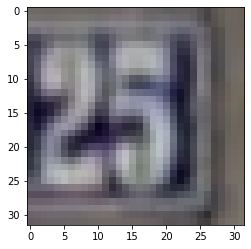

array([2.])

In [ ]:
# show sample
import matplotlib.pyplot as plt

# try to run this block multiple times
import random
image_ind = random.randint(0,5000)
plt.imshow(train_data['X'][:,:,:,image_ind])
plt.show()
#print(len(y_train))
y_train[image_ind]

## 1) KNN

### Code to find the best parameter

Code to calculate the accuracy, precision, recall and f1 score for different values of n-neighbors in KNN model (from 1 to 501) and plot them to visualize and find the best suited parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import the package for KNN
from sklearn import metrics    # import the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Define the empty arrays to populate the parameter values
acc = []
pre = []
rec = []
f1 = []

# create KNN models with different values of n-neighbors and populate the 
# metrics in the respective arrays

for i in range(1,501):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train) # training
  knn_predictions = knn.predict(X_test)
  acc.append(accuracy_score(y_test, knn_predictions))
  pre.append(precision_score(y_test, knn_predictions, average='macro'))
  rec.append(recall_score(y_test, knn_predictions, average='macro'))
  f1.append(f1_score(y_test, knn_predictions, average='macro'))


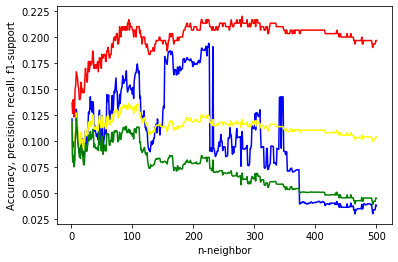

In [ ]:
import matplotlib.pyplot as plt

# Plot the metric array values calculated in the arrays above
y1 = range(1, 501)
plt.plot(y1, acc, color = 'red')
plt.plot(y1, pre, color='blue')
plt.plot(y1, rec, color='yellow')
plt.plot(y1, f1, color='green')
plt.xlabel('n-neighbor')
plt.ylabel('Accuracy, precision, recall, f1-support')

plt.show()

### Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import the package for KNN
knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train) # training

KNeighborsClassifier(n_neighbors=500)

###Testing

In [ ]:
# testing
knn_predictions = knn.predict(X_test)
# knn_predictions

###Printing the results

In [ ]:
# printing the results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions, average="macro"))
print("Recall:", recall_score(y_test, knn_predictions, average="macro"))
print("F1 score:", f1_score(y_test, knn_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, knn_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, knn_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.19666666666666666
Precision: 0.03810935441370224
Recall: 0.1041299117882919
F1 score: 0.04524182404421925

Confusion matrix:
[[55  2  1  0  0  0  0  0  0  0]
 [39  4  0  0  0  0  0  0  0  0]
 [41  3  0  0  0  0  0  0  0  0]
 [30  6  0  0  0  0  0  0  0  0]
 [22  4  0  1  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [15  2  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0]
 [18  1  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]]

Classification report:
              precision    recall  f1-score   support

         1.0      0.199     0.948     0.329        58
         2.0      0.182     0.093     0.123        43
         3.0      0.000     0.000     0.000        44
         4.0      0.000     0.000     0.000        36
         5.0      0.000     0.000     0.000        27
         6.0      0.000     0.000     0.000        20
         7.0      0.000     0.000     0.000        17
         8.0      0.000   

###Plotting the learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

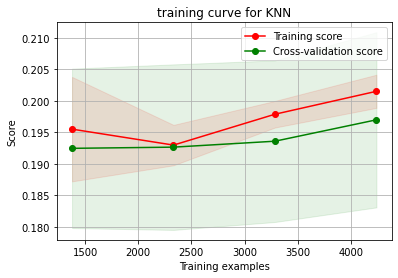

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#plot_learning_curve( knn, 'training curve for KNN', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)
plot_learning_curve( knn, 'training curve for KNN', X, y, axes=axes, cv = cv, n_jobs=4)

## 2) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
acc = []
pre = []
rec = []
f1 = []
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
svc_predictions = clf.predict(X_test)
acc.append(accuracy_score(y_test, svc_predictions))
pre.append(precision_score(y_test, svc_predictions, average='macro'))
rec.append(recall_score(y_test, svc_predictions, average='macro'))
f1.append(f1_score(y_test, svc_predictions, average='macro'))


### Training

In [ ]:
#from sklearn.svm import SVC
#clf = SVC(kernel='rbf')
#clf.fit(X_train, y_train)

### Testing

In [ ]:
# testing
svc_predictions = clf.predict(X_test)
svc_predictions

array([ 1.,  2.,  1., 10.,  1.,  1.,  2.,  1.,  1.,  6.,  1.,  2.,  2.,
        1.,  4.,  4.,  1.,  1.,  3.,  4.,  2., 10.,  1.,  1.,  2.,  8.,
        1.,  1.,  4.,  1., 10.,  2.,  3.,  1.,  1.,  1.,  6.,  1.,  2.,
        2.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 10.,  3., 10.,  1.,
        5.,  1.,  2.,  4.,  4.,  5.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  4.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        3.,  1.,  4.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  8.,  1.,  1.,
        4.,  5.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  4.,  2.,  2.,  3.,
        2.,  2.,  1.,  1.,  1.,  6.,  1.,  1.,  1.,  2.,  5.,  1.,  1.,
        7.,  1.,  1.,  1.,  3.,  1.,  7.,  1.,  2.,  1.,  1.,  2.,  3.,
        4.,  2.,  3.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  4.,
        6.,  1.,  2.,  1.,  1.,  4.,  3.,  1.,  1.,  9.,  1.,  4.,  1.,
        1.,  8.,  1.,  1.,  4.,  9.,  3.,  6.,  1.,  1.,  1.,  1.,  1.,
        2.,  7.,  1.,  1.,  2.,  1.,  4.,  1.,  2.,  6.,  2.,  1

### Printing the results

In [ ]:
# printing the results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, svc_predictions))
print("Precision:", precision_score(y_test, svc_predictions, average="macro"))
print("Recall:", recall_score(y_test, svc_predictions, average="macro"))
print("F1 score:", f1_score(y_test, svc_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, svc_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.18
Precision: 0.10135409393473908
Recall: 0.11438814588901111
F1 score: 0.09409130511136851

Confusion matrix:
[[35 10  3  1  0  4  2  1  1  1]
 [23  9  3  2  2  0  0  2  2  0]
 [26  9  3  1  0  1  0  2  0  2]
 [16  7  3  5  1  2  0  0  2  0]
 [11  4  3  4  0  1  0  2  1  1]
 [ 9  5  2  1  1  0  1  0  0  1]
 [ 6  2  2  2  2  1  0  0  0  2]
 [12  2  2  4  1  0  1  0  0  0]
 [ 8  5  0  2  1  1  0  0  1  1]
 [ 9  2  0  0  1  0  1  0  0  1]]

Classification report:
              precision    recall  f1-score   support

         1.0      0.226     0.603     0.329        58
         2.0      0.164     0.209     0.184        43
         3.0      0.143     0.068     0.092        44
         4.0      0.227     0.139     0.172        36
         5.0      0.000     0.000     0.000        27
         6.0      0.000     0.000     0.000        20
         7.0      0.000     0.000     0.000        17
         8.0      0.000     0.000     0.

### Plotting the learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

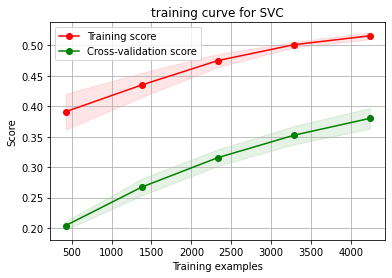

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( clf, 'training curve for SVC', X, y, axes=axes, cv = cv, n_jobs=4)

PARAMETER = POLY

In [ ]:
acc = []
pre = []
rec = []
f1 = []
clf1 = SVC(kernel='poly')
clf1.fit(X_train, y_train)
svc_predictions = clf1.predict(X_test)
acc.append(accuracy_score(y_test, svc_predictions))
pre.append(precision_score(y_test, svc_predictions, average='macro'))
rec.append(recall_score(y_test, svc_predictions, average='macro'))
f1.append(f1_score(y_test, svc_predictions, average='macro'))


In [ ]:
svc_predictions = clf1.predict(X_test)
svc_predictions

array([ 1.,  2.,  1., 10., 10.,  1.,  1.,  1.,  1.,  8.,  1.,  1.,  2.,
        1.,  4.,  4.,  1.,  6.,  3.,  4.,  2., 10.,  1.,  3.,  2.,  5.,
        2.,  1.,  4.,  2.,  9.,  3.,  6., 10.,  5.,  1.,  5.,  1.,  1.,
        2.,  8.,  1.,  6.,  1.,  1.,  1.,  1.,  2., 10.,  4., 10.,  1.,
        5.,  2., 10.,  4.,  4.,  2.,  1.,  8.,  1.,  2.,  2.,  4.,  1.,
        1.,  4.,  5.,  5.,  5.,  1.,  5.,  1.,  1.,  4.,  6.,  2.,  4.,
        3.,  1.,  4.,  1.,  2.,  1.,  2.,  1.,  7.,  1., 10.,  1., 10.,
        4.,  6.,  4.,  6.,  7.,  2.,  1.,  1.,  1.,  4.,  5.,  2.,  8.,
        2.,  2.,  3.,  1.,  8.,  6.,  3.,  1.,  6.,  2.,  5.,  7.,  2.,
        2., 10.,  2.,  8.,  8.,  1.,  7.,  9.,  4.,  1.,  4.,  2.,  3.,
        6.,  2., 10.,  4.,  8.,  1.,  1.,  1.,  1.,  1.,  7.,  9.,  4.,
        6.,  7.,  2.,  1.,  1.,  9.,  3.,  1.,  5.,  9.,  1.,  1.,  1.,
        1.,  8.,  1.,  5.,  4.,  9.,  9.,  6.,  1.,  4.,  1.,  4.,  6.,
        2.,  7.,  1.,  1.,  2.,  1.,  4.,  1., 10.,  6.,  7.,  1

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, svc_predictions))
print("Precision:", precision_score(y_test, svc_predictions, average="macro"))
print("Recall:", recall_score(y_test, svc_predictions, average="macro"))
print("F1 score:", f1_score(y_test, svc_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, svc_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.11
Precision: 0.0853105613077223
Recall: 0.08499079870624208
F1 score: 0.08203027966185861

Confusion matrix:
[[15 14  4  4  3  4  4  3  6  1]
 [15  5  3  2  1  4  1  5  3  4]
 [16  4  4  6  4  2  1  2  2  3]
 [ 9  5  3  3  4  4  1  1  4  2]
 [10  4  0  3  2  0  0  2  2  4]
 [ 6  4  3  2  0  1  2  1  0  1]
 [ 3  1  2  3  2  1  0  2  0  3]
 [ 7  6  2  2  2  0  2  0  1  0]
 [ 6  2  1  3  1  2  0  0  2  2]
 [ 5  2  0  1  2  0  2  1  0  1]]

Classification report:
              precision    recall  f1-score   support

         1.0      0.163     0.259     0.200        58
         2.0      0.106     0.116     0.111        43
         3.0      0.182     0.091     0.121        44
         4.0      0.103     0.083     0.092        36
         5.0      0.095     0.074     0.083        27
         6.0      0.056     0.050     0.053        20
         7.0      0.000     0.000     0.000        17
         8.0      0.000     0.000     0.0

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

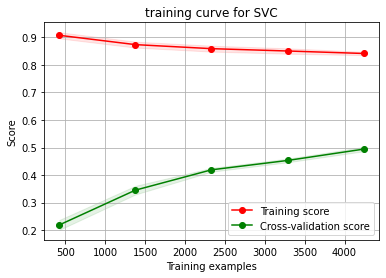

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( clf1, 'training curve for SVC', X, y, axes=axes, cv = cv, n_jobs=4)

PARAMETER = SIGMOID

In [ ]:
acc = []
pre = []
rec = []
f1 = []
clf2 = SVC(kernel='sigmoid')
clf2.fit(X_train, y_train)
svc_predictions = clf2.predict(X_test)
acc.append(accuracy_score(y_test, svc_predictions))
pre.append(precision_score(y_test, svc_predictions, average='macro'))
rec.append(recall_score(y_test, svc_predictions, average='macro'))
f1.append(f1_score(y_test, svc_predictions, average='macro'))


In [ ]:
svc_predictions = clf2.predict(X_test)
svc_predictions

array([5., 4., 4., 4., 4., 2., 5., 5., 4., 4., 4., 5., 5., 4., 4., 4., 4.,
       4., 4., 4., 1., 1., 1., 1., 4., 4., 5., 5., 5., 1., 1., 1., 1., 1.,
       1., 4., 4., 4., 5., 5., 5., 5., 5., 1., 5., 5., 4., 5., 5., 1., 1.,
       1., 1., 4., 4., 1., 1., 5., 5., 4., 4., 4., 5., 5., 5., 5., 5., 5.,
       4., 4., 1., 4., 4., 1., 1., 2., 1., 1., 1., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 1., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 1.,
       4., 4., 1., 1., 4., 1., 1., 1., 5., 5., 5., 4., 1., 1., 1., 5., 5.,
       1., 5., 1., 5., 5., 4., 4., 1., 1., 4., 4., 4., 4., 4., 4., 5., 1.,
       1., 5., 5., 4., 4., 5., 5., 4., 4., 4., 4., 1., 1., 4., 4., 4., 4.,
       5., 5., 5., 5., 5., 1., 1., 4., 4., 1., 1., 5., 5., 5., 2., 2., 4.,
       4., 5., 5., 5., 5., 5., 1., 4., 1., 1., 5., 1., 2., 5., 5., 2., 1.,
       4., 1., 1., 5., 5., 5., 4., 4., 4., 4., 4., 5., 5., 5., 4., 4., 4.,
       5., 1., 4., 4., 5., 5., 1., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, svc_predictions))
print("Precision:", precision_score(y_test, svc_predictions, average="macro"))
print("Recall:", recall_score(y_test, svc_predictions, average="macro"))
print("F1 score:", f1_score(y_test, svc_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, svc_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.15333333333333332
Precision: 0.04877349588226323
Recall: 0.12203065134099615
F1 score: 0.06712706556395358

Confusion matrix:
[[16  1  0 27 14  0  0  0  0  0]
 [ 9  0  0 17 17  0  0  0  0  0]
 [11  0  0 20 13  0  0  0  0  0]
 [ 9  2  0 18  7  0  0  0  0  0]
 [ 3  1  0 11 12  0  0  0  0  0]
 [ 9  0  0  6  5  0  0  0  0  0]
 [ 5  1  0  8  3  0  0  0  0  0]
 [ 9  2  0  6  5  0  0  0  0  0]
 [ 5  2  0  7  5  0  0  0  0  0]
 [ 3  1  0  8  2  0  0  0  0  0]]

Classification report:
              precision    recall  f1-score   support

         1.0      0.203     0.276     0.234        58
         2.0      0.000     0.000     0.000        43
         3.0      0.000     0.000     0.000        44
         4.0      0.141     0.500     0.220        36
         5.0      0.145     0.444     0.218        27
         6.0      0.000     0.000     0.000        20
         7.0      0.000     0.000     0.000        17
         8.0      0.000  

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

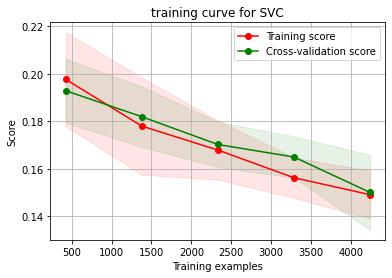

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( clf2, 'training curve for SVC', X, y, axes=axes, cv = cv, n_jobs=4)

## 3) Logistic Regression

###Training

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')
log_reg = LogisticRegression(penalty='l2',solver='sag')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='sag')

### Testing




In [ ]:
# testing
reg_predictions = log_reg.predict(X_test)
#reg_predictions

### Printing the results

In [ ]:
# printing the results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Precision, Recall, Confusion matrix, intraining')
print("\nAccuracy:", accuracy_score(y_test, reg_predictions))
print("Precision:", precision_score(y_test, reg_predictions, average="macro"))
print("Recall:", recall_score(y_test, reg_predictions, average="macro"))
print("F1 score:", f1_score(y_test, reg_predictions, average="macro"))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, reg_predictions))

print("\nClassification report:")
print(metrics.classification_report(y_test, reg_predictions, digits=3))


Precision, Recall, Confusion matrix, intraining

Accuracy: 0.16666666666666666
Precision: 0.1097788916736285
Recall: 0.1171290382774415
F1 score: 0.10400960755856445

Confusion matrix:
[[31  7  6  3  3  1  2  0  4  1]
 [18  8  5  2  1  5  1  1  1  1]
 [22  8  2  3  1  1  3  1  0  3]
 [17  6  4  3  0  1  1  2  2  0]
 [ 9  2  3  3  2  2  0  1  4  1]
 [ 5  6  2  3  2  0  1  0  0  1]
 [ 6  3  2  0  1  2  3  0  0  0]
 [10  5  0  1  1  1  1  0  0  3]
 [10  2  2  0  2  1  0  1  0  1]
 [ 7  3  1  1  1  0  0  0  0  1]]

Classification report:
              precision    recall  f1-score   support

         1.0      0.230     0.534     0.321        58
         2.0      0.160     0.186     0.172        43
         3.0      0.074     0.045     0.056        44
         4.0      0.158     0.083     0.109        36
         5.0      0.143     0.074     0.098        27
         6.0      0.000     0.000     0.000        20
         7.0      0.250     0.176     0.207        17
         8.0      0.000    

### Plotting the learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

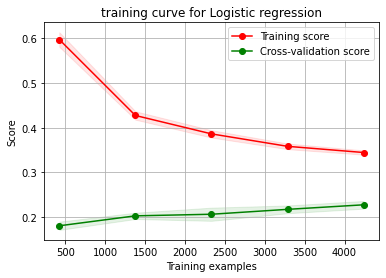

In [ ]:
fig, axes = plt.subplots()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve( log_reg, 'training curve for Logistic regression', X, y, axes=axes, cv = cv, n_jobs=4)